## Req

In [1]:
import re
import unicodedata
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import textstat

from matplotlib.ticker import PercentFormatter
from tqdm.notebook import tqdm

from textblob import TextBlob
from textblob_nl import PatternAnalyzer

warnings.filterwarnings("ignore")

# set language to dutch 
textstat.set_lang("nl")

# progress bar when apply functions to dataframe
tqdm.pandas()

# better quality plots
%config InlineBackend.figure_format = "retina"

# Title font size
TITLE_SIZE = 14


# (merged) Data inladen

In [ ]:
import pandas as pd

# File paths
file1 = r'C:\Users\dylan\Thesis\GIT\Datasets\Open_Data_RDW__Gekentekende_voertuigen_20250311.csv'
file2 = r'C:\Users\dylan\Thesis\GIT\Datasets\Open_Data_RDW__Gekentekende_voertuigen_brandstof_20250310.csv'
output_file_usb = r'D:\merged_dataset_full.csv'

# Choose the correct columns
cols_file1 = ['Kenteken', 'Voertuigsoort', 'Merk', 'Datum eerste toelating']
cols_file2 = ['Kenteken', 'Brandstof omschrijving', 'CO2 uitstoot gecombineerd', 
              'Uitlaatemissieniveau', 'CO2 emissieklasse', 
              'Max vermogen 60 minuten', 'Netto max vermogen elektrisch']

# Step 1: Read the fuel dataset
df_brandstof = pd.read_csv(file2, usecols=cols_file2, dtype=str)

# Step 2: Read and process the vehicle dataset chunkwise
chunk_size = 1000000  # 1 million rows at a time
chunk_iterator = pd.read_csv(file1, usecols=cols_file1, dtype=str, chunksize=chunk_size, parse_dates=['Datum eerste toelating'], dayfirst=True)

# Collection of processed chunks
merged_chunks = []

for chunk in chunk_iterator:
    # Optionally: Adjust date format if needed
    chunk['Datum eerste toelating'] = chunk['Datum eerste toelating'].astype(str)

    # Merge the current chunk with the fuel dataset
    merged_chunk = chunk.merge(df_brandstof, on='Kenteken', how='left')

    # Add to the list
    merged_chunks.append(merged_chunk)

# Combine all chunks
df_merged = pd.concat(merged_chunks, ignore_index=True)

# Save to a CSV file
df_merged.to_csv(output_file_usb, index=False)

print(f"The file has been saved to your USB stick: {output_file_usb}")

print(f"A single chunk processed and saved in: {output_file_usb}")



Verwerken van de datasets: 4chunk [01:38, 24.71s/chunk]


KeyboardInterrupt: 

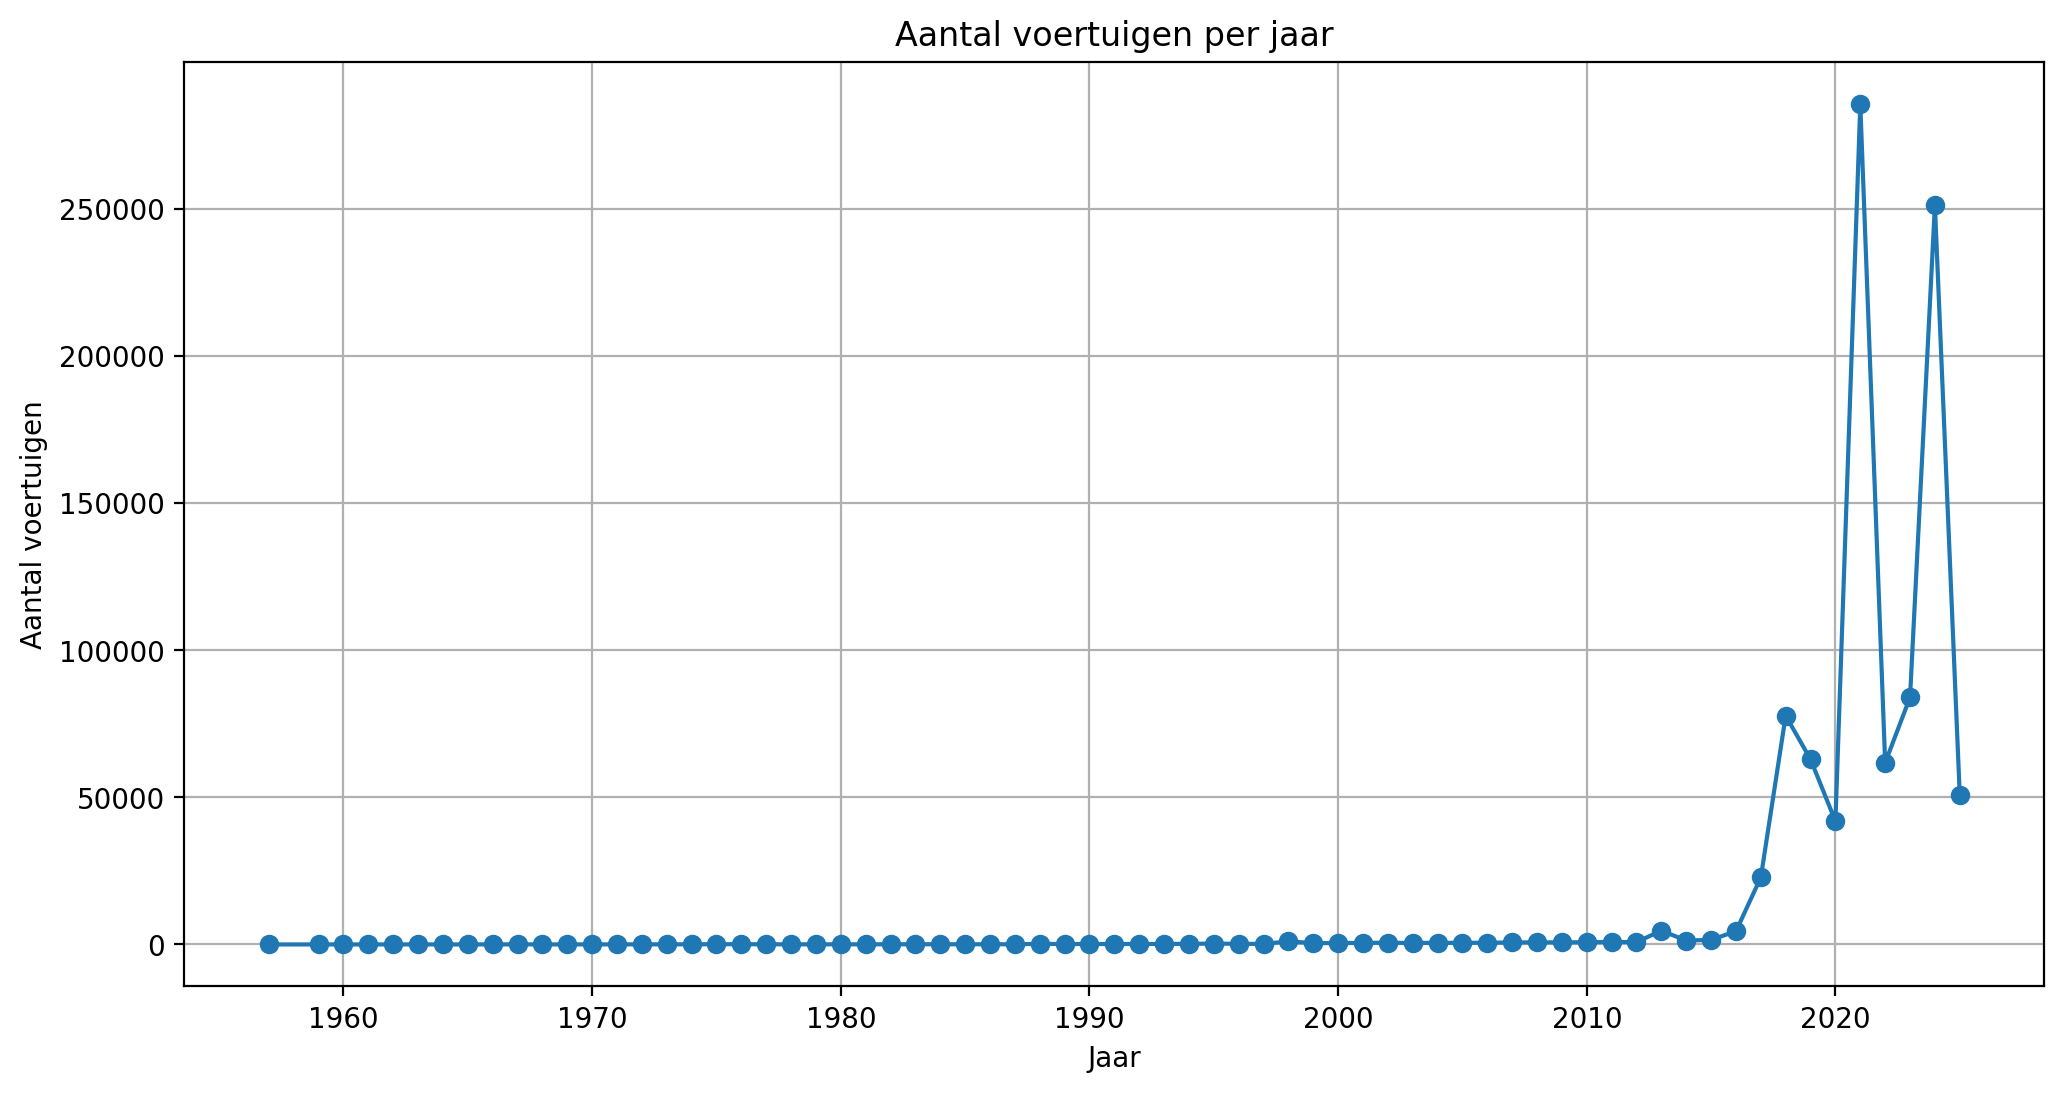

In [7]:
# Convert 'Datum tenaamstelling' to datetime format (assuming it represents years)
df['Datum tenaamstelling'] = pd.to_datetime(df['Datum tenaamstelling'], errors='coerce')

# Extract year from the date
df['Jaar'] = df['Datum tenaamstelling'].dt.year

# Filter out invalid years
df = df.dropna(subset=['Jaar'])
df['Jaar'] = df['Jaar'].astype(int)

# Count the number of vehicles per year
vehicle_counts = df.groupby('Jaar').size()

# Plot the total number of vehicles per year
plt.figure(figsize=(12, 6))
plt.plot(vehicle_counts.index, vehicle_counts.values, marker='o', linestyle='-')
plt.xlabel('Jaar')
plt.ylabel('Aantal voertuigen')
plt.title('Aantal voertuigen per jaar')
plt.grid(True)
plt.show()